# Format data in SpaceTX format

In [80]:
import starfish
import nd2reader
import napari
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import os
from skimage import io
import csv
import shutil
import tempfile

Load Nikon and visualise files [documentation](!https://rbnvrw.github.io/nd2reader/tutorial.html#installation-via-conda-forge)

In [81]:
path_nuclei = 'Z:\Sabrina\Pre-fishcodes\osmFISH\osmFISH_linarsson_data\LB_EXP60_Cortex_Hyb1\LB_EXP60_Cortex_Hyb1_Hyb-1_20160514_192905_459_Seq0003_Hyb1_Nuclei.nd2'
path_background = 'Z:\Sabrina\Pre-fishcodes\osmFISH\osmFISH_linarsson_data\LB_EXP60_Cortex_Hyb1\LB_EXP60_Cortex_Hyb1_Hyb-1_20160514_192905_459_Seq0004_Hyb1_Background.nd2'
path_foxj1 = 'Z:\Sabrina\Pre-fishcodes\osmFISH\osmFISH_linarsson_data\LB_EXP60_Cortex_Hyb1\LB_EXP60_Cortex_Hyb1_Hyb-1_20160514_192905_459_Seq0000_Hyb1_Foxj1.nd2'
path_aldoc = 'Z:\Sabrina\Pre-fishcodes\osmFISH\osmFISH_linarsson_data\LB_EXP60_Cortex_Hyb1\LB_EXP60_Cortex_Hyb1_Hyb-1_20160514_192905_459_Seq0001_Hyb1_Aldoc.nd2'
path_tbr1 = 'Z:\Sabrina\Pre-fishcodes\osmFISH\osmFISH_linarsson_data\LB_EXP60_Cortex_Hyb1\LB_EXP60_Cortex_Hyb1_Hyb-1_20160514_192905_459_Seq0002_Hyb1_Tbr1.nd2'

In [23]:
with ND2Reader(path_aldoc) as images:
    #plt.imshow(images[0])
    images.iter_axes = 'v'
    with napari.gui_qt():
        viewer = napari.Viewer()
        for fov in images[100:110]:
            viewer.add_image(fov)

Read metadata
- width: the width of the image in pixels

- height: the height of the image in pixels

- date: the date the image was taken

- fields_of_view: the fields of view in the image

- frames: a list of all frame numbers

- z_levels: the z levels in the image

- total_images_per_channel: the number of images per color channel

- channels: the color channels

- pixel_microns: the amount of microns per pixel

- rois: the regions of interest (ROIs) defined by the user

- experiment: information about the nature and timings of the ND experiment

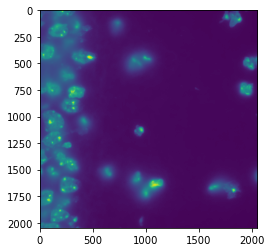

In [42]:
with ND2Reader(path) as images:
    #print(images.sizes)
    plt.imshow(images.get_frame_2D(0,0,0,0,0))

In [24]:
with ND2Reader(path) as images:
    print('The size of the data is:',images.sizes)

The size of the data is: {'x': 2048, 'y': 2048, 't': 1, 'z': 45, 'v': 220}


In [32]:
220*45

9900

Create fovs and fovs_coordinates

In [ ]:
#read Nikon data and split it into FOV corresponding to fov

In [28]:
for fov_id, fov in enumerate(fovs):
    print(fov)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2)]
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2)]


In [33]:
fovs = [
    [#round,channel,z_plane
        (0, 0, 1),
        (0, 0, 2),
        (0, 0, 3),
        (0, 0, 4),
        (0, 0, 5),
        (0, 0, 6),
    ],
    [
        (0, 0, 1),
        (0, 0, 2),
        (0, 0, 3),
        (0, 0, 4),
        (0, 0, 5),
        (0, 0, 6),
    ],
]

In [34]:
coordinates_of_fovs = [
    {
        'xc_min': -591.7,
        'xc_max': -465.9,
        'yc_min': -25331.6,
        'yc_max': -25331.9,
        'zc_min': 3344.13,
        'zc_max': 3344.33,
    },
    {
        'xc_min': -465.9,
        'xc_max': -339,
        'yc_min': -25331.9,
        'yc_max': -25332.8,
        'zc_min': 3344.33,
        'zc_max': 3344.05,
    },
]

Split files in tiff directories

In [73]:
primary_dir = r'X:\Sabrina\Pre-fishcodes\osmFISH\osmFISH_linarsson_data\LB_EXP60_Cortex_Hyb1\primary'
nuclei_dir = r'X:\Sabrina\Pre-fishcodes\osmFISH\osmFISH_linarsson_data\LB_EXP60_Cortex_Hyb1\nuclei'

for fov_id, fov in enumerate(fovs):
    for round_label, ch_label, zplane_label in fov:
        primary_path = os.path.join(
            primary_dir, f"primary-f{fov_id}-r{round_label}-c{ch_label}-z{zplane_label}.tiff")
        nuclei_path = os.path.join(
            nuclei_dir, f"nuclei-f{fov_id}-r{round_label}-c{ch_label}-z{zplane_label}.tiff")
        print(round_label, ch_label, zplane_label)
        with ND2Reader(path_aldoc) as data_aldoc:
            io.imsave(primary_path, data_aldoc.get_frame_2D(c=ch_label,t=0, z=zplane_label,v=fov_id))
        with ND2Reader(path_nuclei) as data_nuclei: 
            io.imsave(nuclei_path, data_nuclei.get_frame_2D(c=ch_label,t=0, z=zplane_label,v=fov_id))


0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6


Create coordinates.csv file

In [74]:
# write coordinates file for primary and nuclei in their respective directories
with open(os.path.join(primary_dir, "coordinates.csv"), "w") as fh:
    csv_writer = csv.DictWriter(
        fh,
        [
            'fov', 'round', 'ch', 'zplane',
            'xc_min', 'yc_min', 'zc_min', 'xc_max', 'yc_max', 'zc_max',
        ]
    )
    csv_writer.writeheader()
    for fov_id, (fov_info, coordinate_of_fov) in enumerate(zip(fovs, coordinates_of_fovs)):
        for round_label, ch_label, zplane_label in fov:
            tile_coordinates = coordinate_of_fov.copy()
            tile_coordinates.update({
                'fov': fov_id,
                'round': round_label,
                'ch': ch_label,
                'zplane': zplane_label,
            })
            csv_writer.writerow(tile_coordinates)

# copy same coordinates file to nuclei directory
shutil.copyfile(
    os.path.join(primary_dir, "coordinates.csv"), os.path.join(nuclei_dir, "coordinates.csv"))

'X:\\Sabrina\\Pre-fishcodes\\osmFISH\\osmFISH_linarsson_data\\LB_EXP60_Cortex_Hyb1\\nuclei\\coordinates.csv'

Convert structured data in SpaceTx format

In [1]:
outputdir = tempfile.TemporaryDirectory()
primary_out = os.path.join(outputdir.name, "primary")
nuclei_out = os.path.join(outputdir.name, "nuclei")
os.makedirs(primary_out, exist_ok=True)
os.makedirs(nuclei_out, exist_ok=True)

from slicedimage import ImageFormat
from starfish.experiment.builder import format_structured_dataset

format_structured_dataset(
    primary_dir,
    os.path.join(primary_dir, "coordinates.csv"),
    primary_out,
    ImageFormat.TIFF,
)
format_structured_dataset(
    nuclei_dir,
    os.path.join(nuclei_dir, "coordinates.csv"),
    nuclei_out,
    ImageFormat.TIFF,
)

NameError: name 'tempfile' is not defined

In [76]:
with open(os.path.join(primary_out, "experiment.json"), "r+") as fh:
    contents = fh.readlines()
    print("original experiment.json\n")
    print("".join(contents))
    contents[3] = ",".join([contents[3].strip("\n"),"\n"])
    contents.insert(4, '\t"nuclei": "../nuclei/nuclei.json"\n')  # new_string should end in a newline
    fh.seek(0)  # readlines consumes the iterator, so we need to start over
    fh.writelines(contents)  # No need to truncate as we are increasing filesize
    fh.seek(0)
    print("\nmodified experiment.json\n")
    print(fh.read())

original experiment.json

{
    "version": "5.0.0",
    "images": {
        "primary": "primary.json"
    },
    "extras": {},
    "codebook": "codebook.json"
}

modified experiment.json

{
    "version": "5.0.0",
    "images": {
        "primary": "primary.json",
	"nuclei": "../nuclei/nuclei.json"
    },
    "extras": {},
    "codebook": "codebook.json"
}


In [77]:
with open(os.path.join(primary_out, "codebook.json"), "r") as fh:
    print(fh.read())

{"version": "0.0.0", "mappings": [{"codeword": [{"r": 0, "c": 0, "v": 1.0}], "target": "PLEASE_REPLACE_ME"}]}


In [78]:
from starfish import Experiment

exp = Experiment.from_json(os.path.join(primary_out, "experiment.json"))
print(exp.fovs())

FileNotFoundError: [Errno 2] No such file or directory: 'X:\\Sabrina\\Pre-fishcodes\\osmFISH\\osmFISH_linarsson_data\\LB_EXP60_Cortex_Hyb1\\primary_bis\\..\\nuclei\\nuclei.json'